# The Mandelbrot set
#### The Mandelbrot set is those complex numbers $c$ that as $n$ goes to infinity in the following recrusive relation, the absolute value of $z$, $|z|$  don't go to inifinity:
$z_0\leftarrow 0$<br>
$z_n\leftarrow z^2_{n-1}+c $, for $n>0$
<br>
<br> In the following, we use two implementations for visualizing the Mandelbrot set
###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
# importing the required modules
from matplotlib import pyplot as plt
import numpy as np

The simple implementation of the Mandelbrot set, which is kind of slow:

In [294]:
# Mandelbrot set: straightforward (slow) implementation
def f(z,c):
    return z**2+c

def mandelset(rows=512,cols=512,max_val=2,max_iter=100):
    image=255*max_iter*np.ones((rows,cols),dtype=np.int32)
    xmin,xmax,ymin,ymax=-2.1,.6,-1.2,1.2
    for row in range(rows):
        for col in range(cols):
            x=xmin+col*(xmax-xmin)/(cols-1)
            y=ymin+row*(ymax-ymin)/(rows-1)
            c=complex(x,y); 
            z=complex(0)
            for iter in range(max_iter):
                z=f(z,c)
                if abs(z)>max_val:
                    image[row,col]=255*iter
                    break                    
    image=(image/max_iter).astype('int')
    return image

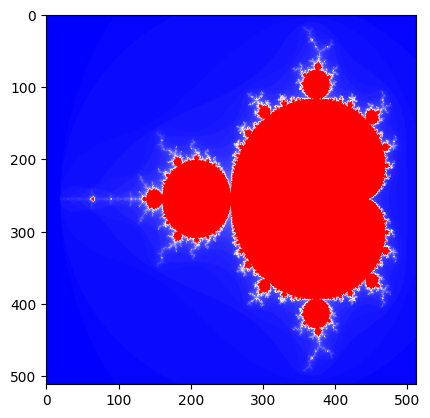

In [295]:
image=mandelset()
plt.imshow(image,cmap=plt.cm.bwr)
plt.show()

The numpy-based implementation of the Mandelbrot set, which is quite fast:

In [306]:
# Mandelbrot set: Numpy-based (fast) implementation
# This is faster than the straight version
def mandelset_np(rows=512,cols=512, max_val=2,max_iter=100): 
    x, y = np.meshgrid(np.linspace(-2.1, .6, cols),
                       np.linspace(-1.2, 1.2, rows))
    c = x + 1j * y
    z = np.zeros_like(c)
    image = 255*max_iter*np.ones(z.shape,dtype=np.int32)
    for iter in range(max_iter):
        indices = (image == 255*max_iter)
        z[indices] = z[indices]**2 + c[indices]
        image[indices & (np.abs(z) > max_val)] = 255*iter
    image=(image/max_iter).astype('int')
    return image

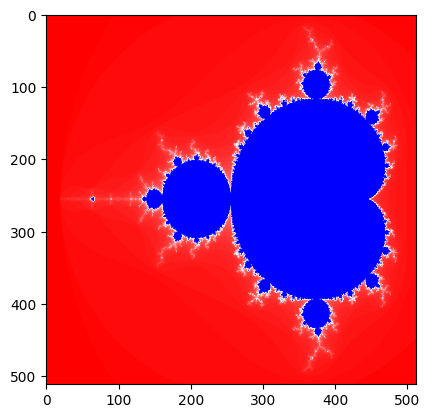

In [307]:
image2=mandelset_np()
plt.imshow(image2,cmap=plt.cm.bwr_r)
plt.show()